In [ ]:
#Módulos necessários
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sns

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

from google.colab import widgets

from IPython.core.display import display, HTML
import base64
!pip install facets-overview==1.0.0
from facets_overview.feature_statistics_generator import FeatureStatisticsGenerator

In [ ]:
Colunas = ["age", "workclass", "fnlwgt", "education", "education_num",
           "marital_status", "occupation", "relationship", "race", "gender",
           "capital_gain", "capital_loss", "hours_per_week", "native_country",
           "income_bracket"]

train =  pd.read_csv('/content/train.csv', names=Colunas, sep=r'\s*,\s*', 
                       engine='python', na_values="?")
test = pd.read_csv('/content/test.csv',names=Colunas, sep=r'\s*,\s*', skiprows=[0],
                      engine='python', na_values="?")
# Retirar linhas com valores ausentes
train = train.dropna(how="any", axis=0)
test = test.dropna(how="any", axis=0)
train.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
count,"30,162.0000",30162,"30,162.0000",30162,"30,162.0000",30162,30162,30162,30162,30162,"30,162.0000","30,162.0000","30,162.0000",30162,30162
unique,nan,7,nan,16,nan,7,14,6,5,2,nan,nan,nan,41,2
top,nan,Private,nan,HS-grad,nan,Married-civ-spouse,Prof-specialty,Husband,White,Male,nan,nan,nan,United-States,<=50K
freq,nan,22286,nan,9840,nan,14065,4038,12463,25933,20380,nan,nan,nan,27504,22654
mean,38.4379,NaN,"189,793.8339",NaN,10.1213,NaN,NaN,NaN,NaN,NaN,"1,092.0079",88.3725,40.9312,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
min,17.0000,NaN,"13,769.0000",NaN,1.0000,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,1.0000,NaN,NaN
25%,28.0000,NaN,"117,627.2500",NaN,9.0000,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,40.0000,NaN,NaN
50%,37.0000,NaN,"178,425.0000",NaN,10.0000,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,40.0000,NaN,NaN
75%,47.0000,NaN,"237,628.5000",NaN,13.0000,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,45.0000,NaN,NaN


In [ ]:
#Visualizar os Dados com Facets
fsg = FeatureStatisticsGenerator()
dataframes = [
    {'table': train, 'name': 'trainData'}]
censusProto = fsg.ProtoFromDataFrames(dataframes)
protostr = base64.b64encode(censusProto.SerializeToString()).decode("utf-8")


HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

In [ ]:
#Definir o número de pontos de dados a visualizar em Facets Dive

SAMPLE_SIZE = 5000
  
train_dive = train.sample(SAMPLE_SIZE).to_json(orient='records')

HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-dive id="elem" height="600"></facets-dive>
        <script>
          var data = {jsonstr};
          document.querySelector("#elem").data = data;
        </script>"""
html = HTML_TEMPLATE.format(jsonstr=train_dive)
display(HTML(html))

In [ ]:
def pandas_to_numpy(data):
  # Retirar linhas com valores ausentes
  data = data.dropna(how="any", axis=0)

  # Separar DataFrame em duas matrizes Numpy
  labels = np.array(data['income_bracket'] == ">50K")
  features = data.drop('income_bracket', axis=1)
  features = {name:np.array(value) for name, value in features.items()}
  
  return features, labels

In [ ]:
#Características categóricas e numéricas

occupation = tf.feature_column.categorical_column_with_hash_bucket(
    "occupation", hash_bucket_size=1000)
native_country = tf.feature_column.categorical_column_with_hash_bucket(
    "native_country", hash_bucket_size=1000)


gender = tf.feature_column.categorical_column_with_vocabulary_list("gender", ["Female",
                                                                              "Male"])
race = tf.feature_column.categorical_column_with_vocabulary_list("race", ["White", 
                                                                          "Asian-Pac-Islander", 
                                                                          "Amer-Indian-Eskimo", 
                                                                          "Other", "Black"])
education = tf.feature_column.categorical_column_with_vocabulary_list("education", ["Bachelors",
                                                                                    "HS-grad",
                                                                                    "11th",
                                                                                    "Masters",
                                                                                    "9th",
                                                                                    "Some-college",
                                                                                    "Assoc-acdm",
                                                                                     "Assoc-voc",
                                                                                     "7th-8th",
                                                                                    "Doctorate",
                                                                                    "Prof-school",
                                                                                    "5th-6th",
                                                                                    "10th",
                                                                                    "1st-4th",
                                                                                    "Preschool",
                                                                                    "12th"])
marital_status = tf.feature_column.categorical_column_with_vocabulary_list("marital_status", ["Married-civ-spouse",
                                                                                              "Divorced",
                                                                                              "Married-spouse-absent",
                                                                                              "Never-married",
                                                                                              "Separated",
                                                                                              "Married-AF-spouse",
                                                                                              "Widowed"])
relationship = tf.feature_column.categorical_column_with_vocabulary_list("relationship", ["Husband",
                                                                                          "Not-in-family",
                                                                                          "Wife",
                                                                                          "Own-child",
                                                                                          "Unmarried",
                                                                                          "Other-relative"])
workclass = tf.feature_column.categorical_column_with_vocabulary_list("workclass", ["Self-emp-not-inc",
                                                                                    "Private",
                                                                                    "State-gov",
                                                                                    "Federal-gov",
                                                                                    "Local-gov",
                                                                                    "?",
                                                                                    "Self-emp-inc",
                                                                                    "Without-pay",
                                                                                    "Never-worked"])

age = tf.feature_column.numeric_column("age")
fnlwgt = tf.feature_column.numeric_column("fnlwgt")
education_num = tf.feature_column.numeric_column("education_num")
capital_gain = tf.feature_column.numeric_column("capital_gain")
capital_loss = tf.feature_column.numeric_column("capital_loss")
hours_per_week = tf.feature_column.numeric_column("hours_per_week")

#Categorizar "Idade"
age_buckets = tf.feature_column.bucketized_column(
    age, boundaries=[18, 25, 30, 35, 40, 45, 50, 55, 60, 65])

In [ ]:
# Lista de variáveis, com tratamento especial para subgrupos de gênero.
variables = [native_country, education, occupation, workclass, 
             relationship, age_buckets, race, marital_status]
subgroup_variables = [gender]
feature_columns = variables + subgroup_variables

In [ ]:
#tornar características em vetores e matrizes. Definir o formato da entrada da rede.
deep_columns = [
    tf.feature_column.indicator_column(workclass),
    tf.feature_column.indicator_column(race),
    tf.feature_column.indicator_column(education),
    tf.feature_column.indicator_column(marital_status),
    tf.feature_column.indicator_column(age_buckets),
    tf.feature_column.indicator_column(relationship),
    tf.feature_column.embedding_column(native_country, dimension=8),
    tf.feature_column.embedding_column(occupation, dimension=8),
]

In [ ]:
#Parâmetros
# Camadas ocultas/taxa de aprendizagem/regularizadores/epochs/batch size
HIDDEN_LAYER_01 = 128
HIDDEN_LAYER_02 = 64 
HIDDEN_LAYER_03 = 32 
LEARNING_RATE = 0.1
L1 = 0.001 
L2 = 0.001 
EPOCHS =  25
BATCH = 500 
RANDOM = 512
tf.random.set_seed(RANDOM)
# Lista de métricas embutidas para avaliação da performance.
metrics = [tf.keras.metrics.TruePositives(name='tp'),
           tf.keras.metrics.FalsePositives(name='fp'),  
           tf.keras.metrics.TrueNegatives(name='tn'),
           tf.keras.metrics.FalseNegatives(name='fn'), 
           tf.keras.metrics.BinaryAccuracy(name='accuracy'),
           tf.keras.metrics.Precision(name='precision'),
           tf.keras.metrics.Recall(name='recall'),
           tf.keras.metrics.AUC(name='auc')]
#Regularizadores L1 e L2, i.e., regularização por decaimento de pesos.
regularizer = tf.keras.regularizers.l1_l2(l1=L1, l2=L2)
#Modelo
model = tf.keras.Sequential([layers.DenseFeatures(deep_columns),
                             layers.Dense(HIDDEN_LAYER_01, activation='relu', kernel_regularizer=regularizer),
                             layers.Dense(HIDDEN_LAYER_02, activation='relu', kernel_regularizer=regularizer),
                             layers.Dense(HIDDEN_LAYER_03, activation='relu', kernel_regularizer=regularizer),
                             layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizer)])

model.compile(optimizer=tf.keras.optimizers.Adagrad(LEARNING_RATE),  
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=metrics)
#Treinar
features, labels = pandas_to_numpy(train)
model.fit(x=features, y=labels, epochs=EPOCHS, batch_size=BATCH)
#Avaliação
features, labels = pandas_to_numpy(test)
model.evaluate(x=features, y=labels);

Epoch 1/25
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
61/61 [==============================] - 4s 11ms/step - loss: 2.1958 - tp: 1862.0000 - fp: 967.0000 - tn: 21687.0000 - fn: 5646.0000 - accuracy: 0.7808 - precision: 0.6582 - recall: 0.2480 - auc: 0.8027
Epoch 2/25
61/61 [==============================] - 1s 11ms/step - loss: 1.6970 - tp: 3989.0000 - fp: 1789.0000 - tn: 20865.0000 - fn: 3519.0000 - accuracy: 0.8240 - precision: 0.6904 - recall: 0.5313 - auc: 0.8664
Epoch 3/25
61/61 [==============================] - 1s 11ms/step - loss: 1.3281 - tp: 4089.0000 - fp: 1814.0000 - tn: 20840.0000 - fn: 3419.0000 - accuracy: 0.8265 - precision: 0.6927 - recall: 0.5446 - auc: 0.8719
Epoch 4/25
61/61 [==============================] - 1s 11ms/step - loss: 1.0346 - tp: 4058.0000 - fp: 1786.0000 - tn: 20868.0000 - fn: 3450.0000 - accuracy: 0.8264 - precision: 0.6944 - recall: 0.5405 - auc: 0.8739
Epoch 5/25
61/61 [=============

In [ ]:
#Função para visualizar a Matriz de Confusão Binária
def plot_confusion_matrix(
    confusion_matrix, class_names, subgroup, figsize = (10,8)):
  df_cm = pd.DataFrame(
      confusion_matrix, index=class_names, columns=class_names, 
  )

  rcParams.update({'font.family':'sans-serif','font.sans-serif':['Liberation Sans'],})
  sns.set_context("notebook", font_scale=1.5)
  fig = plt.figure(figsize=figsize)

  plt.title('Matriz de Confusão para o Desempenho por Gênero')

  # Combine the instance (numercial value) with its description
  strings = np.asarray([['Verdadeiros Positivos', 'Falsos Negativos'],
                        ['Falsos Positivos', 'Verdadeiros Negativos']])
  labels = (np.asarray(
      ["{0:g}\n{1}".format(value, string) for string, value in zip(
          strings.flatten(), confusion_matrix.flatten())])).reshape(2, 2)

  heatmap = sns.heatmap(df_cm, annot=labels, fmt="", 
      linewidths=2.0, cmap=sns.color_palette("flare", as_cmap=True));
  heatmap.yaxis.set_ticklabels(
      heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  heatmap.xaxis.set_ticklabels(
      heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
  plt.ylabel('Referências')
  plt.xlabel('Previsões')
  return fig

,Acurácia,Precisão,Recall,AUC
Widowed,0.9033,0.5000,0.0125,0.7569


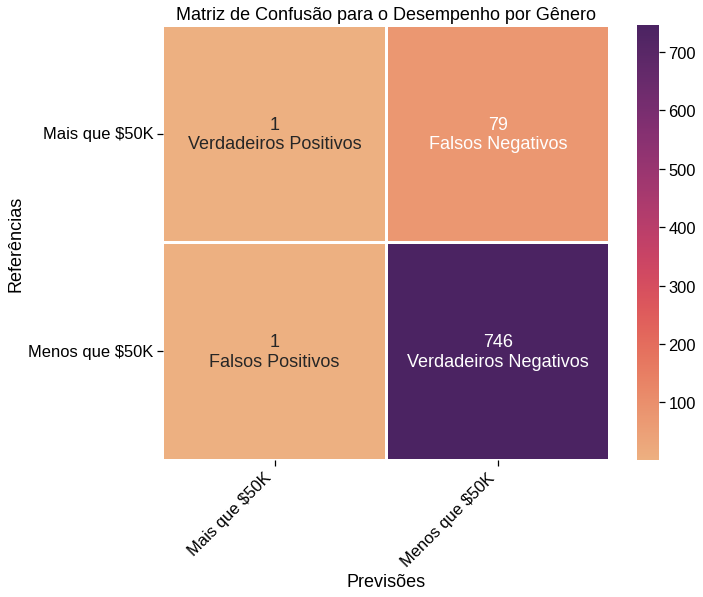

In [ ]:
#@title Visualizar a Matriz de Confusão Binária e Métricas de Avaliação de Cálculo por Subgrupo
CATEGORY  =  "marital_status" #@param {type:"string"}
SUBGROUP =  "Widowed" #@param {type:"string"}

# Labels for annotating axes in plot.
classes = ['Mais que $50K', 'Menos que $50K']

# Given define subgroup, generate predictions and obtain its corresponding 
# ground truth.
subgroup_filter  = train.loc[train[CATEGORY] == SUBGROUP]
features, labels = pandas_to_numpy(subgroup_filter)
subgroup_results = model.evaluate(x=features, y=labels, verbose=0)
confusion_matrix = np.array([[subgroup_results[1], subgroup_results[4]], 
                             [subgroup_results[2], subgroup_results[3]]])

subgroup_performance_metrics = {'Acurácia': subgroup_results[5],
                                'Precisão': subgroup_results[6],
                                'Recall': subgroup_results[7],
                                'AUC': subgroup_results[8]}
                                
performance_df = pd.DataFrame(subgroup_performance_metrics, index=[SUBGROUP])
pd.options.display.float_format = '{:,.4f}'.format

plot_confusion_matrix(confusion_matrix, classes, SUBGROUP);
performance_df

In [ ]:
pd.options.display.float_format = "{:,.4f}".format

data = {'Acurácia': [0.7888, 0.9145],
        'Precisão': [0.7492, 0.7363],
        'Recall': [0.4917, 0.3867],
        'AUC': [0.8592, 0.09118]}

df = pd.DataFrame(data, index=['Male','Female'])

print('\033[1m' + '\033[4m' + 'Performance por Gênero')
df


Performance por Gênero


,Acurácia,Precisão,Recall,AUC
Male,0.7888,0.7492,0.4917,0.8592
Female,0.9145,0.7363,0.3867,0.0912


In [ ]:
data = {'Acurácia': [0.8227, 0.8896, 0.7966, 0.8951, 0.9134],
        'Precisão': [0.7527, 0.7068, 0.6774, 0.6429, 0.5385],
        'Recall': [0.4882, 0.2568, 0.5081, 0.2647, 0.3333],
        'AUC': [0.8812, 0.9102, 0.8592, 0.7831, 0.9209]}

df = pd.DataFrame(data, index=['White','Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'])

print('\033[1m' + '\033[4m' + 'Performance por Raça')
df

Performance por Raça


,Acurácia,Precisão,Recall,AUC
White,0.8227,0.7527,0.4882,0.8812
Black,0.8896,0.7068,0.2568,0.9102
Asian-Pac-Islander,0.7966,0.6774,0.5081,0.8592
Amer-Indian-Eskimo,0.8951,0.6429,0.2647,0.7831
Other,0.9134,0.5385,0.3333,0.9209


In [ ]:
data = {'Acurácia': [0.7120, 0.8949, 0.9189, 0.9524, 0.9329, 0.5238, 0.9033],
        'Precisão': [0.7475, 0.7143, 0.6667, 1.0000, 0.8000, 0.0000, 0.5000],
        'Recall': [0.5541, 0.0332, 0.0645, 0.0149, 0.0606, 0.0000, 0.0125],
        'AUC': [0.7900, 0.7959, 0.8214, 0.8859, 0.8442, 0.6955, 0.7569]}

df = pd.DataFrame(data, index=['Married-Civ-Spouce','Divorced', 'Married-Spouse-Absent', 'Never-Married', 'Separeted', 'Married-AF-Spouce', 'Widowed'])

print('\033[1m' + '\033[4m' + 'Performance por Estado Civil')
df

Performance por Estado Civil


,Acurácia,Precisão,Recall,AUC
Married-Civ-Spouce,0.7120,0.7475,0.5541,0.7900
Divorced,0.8949,0.7143,0.0332,0.7959
Married-Spouse-Absent,0.9189,0.6667,0.0645,0.8214
Never-Married,0.9524,1.0000,0.0149,0.8859
Separeted,0.9329,0.8000,0.0606,0.8442
Married-AF-Spouce,0.5238,0.0000,0.0000,0.6955
Widowed,0.9033,0.5000,0.0125,0.7569
